# Chapter 6. Advanced Probability

## Bayesian ideas revisited

### Bayes theorem

P(B) \* P(A|B) = P(A) \* P(B|A)

### More applications of Bayes theorem

** Example - Titanic **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/SF_DAT_15/master/data/titanic.csv')
titanic['Survived'] = np.where(titanic['Survived']==1, 'yes', 'no')
titanic = titanic[['Sex', 'Survived']]

In [3]:
titanic.head()

,Sex,Survived
0,male,no
1,female,yes
2,female,yes
3,female,yes
4,male,no


In [4]:
num_rows = float(titanic.shape[0])
print(num_rows)

891.0


In [5]:
p_survived = (titanic.Survived=="yes").sum() / num_rows # == .38
print(p_survived)
p_notsurvived = 1 - p_survived                 # == .61
print(p_notsurvived)

0.3838383838383838
0.6161616161616161


In [6]:
p_male = (titanic.Sex=="male").sum() / num_rows     # == .65
print(p_male)
p_female = 1 - p_male # == .35
print(p_female)

0.6475869809203143
0.3524130190796857


In [7]:
number_of_women = titanic[titanic.Sex=='female'].shape[0]
print(number_of_women)
women_who_lived = titanic[(titanic.Sex=='female') & (titanic.Survived=='yes')].shape[0]
print(women_who_lived)
p_survived_given_woman = women_who_lived / float(number_of_women)
print(p_survived_given_woman)

314
233
0.7420382165605095


In [8]:
number_of_survivors = titanic[titanic.Survived=='yes'].shape[0]
print(number_of_survivors)
women_who_lived = titanic[(titanic.Sex=='female') & (titanic.Survived=='yes')].shape[0]
print(women_who_lived)
p_woman_given_survived = women_who_lived / float(number_of_survivors)
print(p_woman_given_survived)

342
233
0.6812865497076024


## Random variables

### Discrete random variables

In [9]:
import random
def random_variable_of_dice_roll():
    return random.randint(1, 6)
    

In [10]:
trials = []
num_trials = 100
for trial in range(num_trials):
    trials.append(random_variable_of_dice_roll())
print( sum(trials) / float(num_trials) )

3.33


Text(0, 0.5, 'Average')

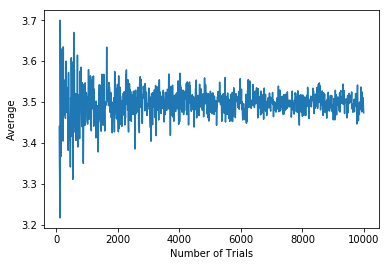

In [11]:
num_trials = range(100, 10000, 10)
avgs = []
for num_trial in num_trials:
    trials = []
    for trial in range(1, num_trial):
        trials.append(random_variable_of_dice_roll())
    avgs.append( sum(trials) / float(num_trial) )

plt.plot(num_trials, avgs)
plt.xlabel('Number of Trials')
plt.ylabel("Average")

#### Types of discrete random variables  
* Binomial random variables  
* Geometric random variables  
* Poisson random variable  


### Continuous random variables  

In [12]:
def normal_pdf(x, mu = 0, sigma = 1):
    return (1./np.sqrt(2*3.14 * sigma**2)) * 2.718**(-(x-mu)**2 / (2. * sigma**2))

mean = 0, standard deviation = 1


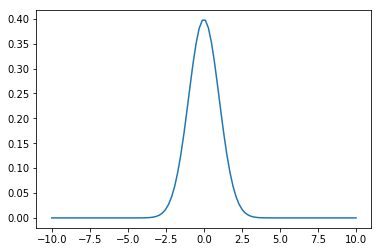

In [13]:
print('mean = 0, standard deviation = 1')
x_values = np.linspace(-10,10,100)
y_values = [normal_pdf(x) for x in x_values]
plt.plot(x_values, y_values)

mean = 5, standard deviation = 1


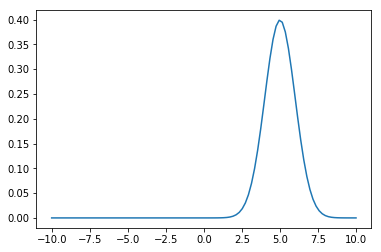

In [14]:
print('mean = 5, standard deviation = 1')
x_values = np.linspace(-10,10,100)
y_values = [normal_pdf(x, mu = 5) for x in x_values]
plt.plot(x_values, y_values)

mean = 0, standard deviation = 5


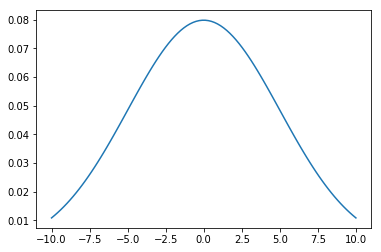

In [15]:
print('mean = 0, standard deviation = 5')
x_values = np.linspace(-10,10,100)
y_values = [normal_pdf(x, sigma = 5) for x in x_values]
plt.plot(x_values, y_values)

mean = -5, standard deviation = 5


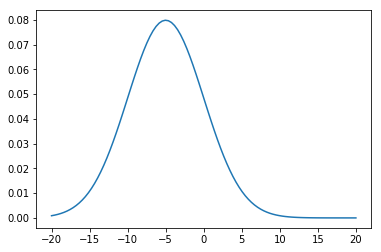

In [16]:
print('mean = -5, standard deviation = 5')
x_values = np.linspace(-20,20,100)
y_values = [normal_pdf(x, mu = -5, sigma = 5) for x in x_values]
plt.plot(x_values, y_values)